In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')


In [2]:
# pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Assuming the file is named 'movies_data.csv'
df = pd.read_csv('C:\\Users\\Naman\\Downloads\\TMDB_movie_dataset_v11.csv')

# Display the first few rows to understand the data
df.head()


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%d-%m-%Y', errors='coerce')

# Convert 'vote_average', 'vote_count', 'budget', and 'revenue' to numeric
columns_to_convert = ['vote_average', 'vote_count', 'budget', 'revenue']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop duplicates if any
df = df.drop_duplicates()

# Fill missing numerical values with 0 for simplicity (or use other strategies)
df.fillna({'runtime': 0, 'budget': 0, 'revenue': 0, 'vote_average': 0, 'vote_count': 0}, inplace=True)

# Display cleaned data
df.info()


Missing Values:
id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             186370
revenue                       0
runtime                       0
adult                         0
backdrop_path            833892
budget                        0
homepage                1014940
imdb_id                  532931
original_language             0
original_title               13
overview                 230017
popularity                    0
poster_path              357861
tagline                  976088
genres                   454837
production_companies     622795
production_countries     502697
spoken_languages         483622
keywords                 827415
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1134877 entries, 0 to 1135247
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------

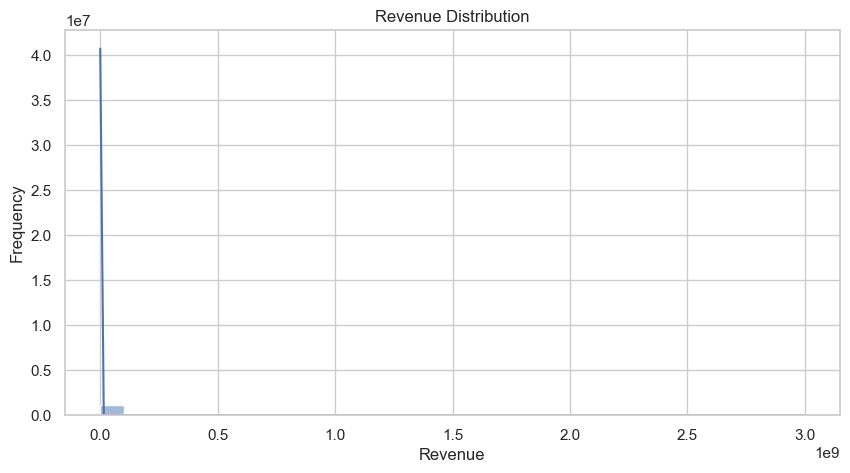

In [5]:
# Descriptive statistics
df.describe()

# Revenue distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['revenue'], kde=True, bins=30)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


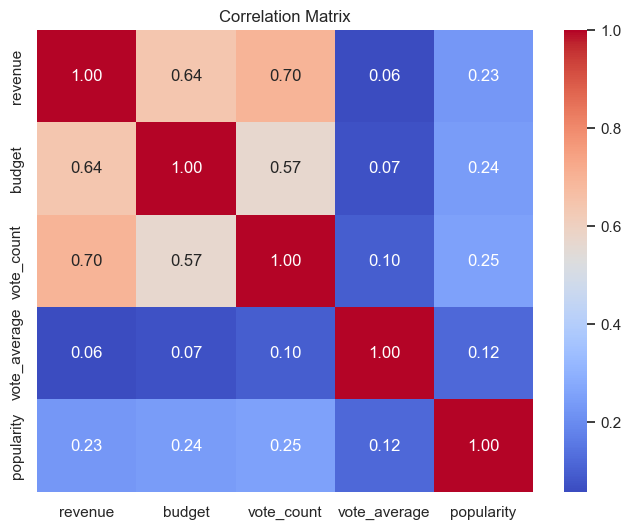

In [6]:
# Correlation matrix
correlation_matrix = df[['revenue', 'budget', 'vote_count', 'vote_average', 'popularity']].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


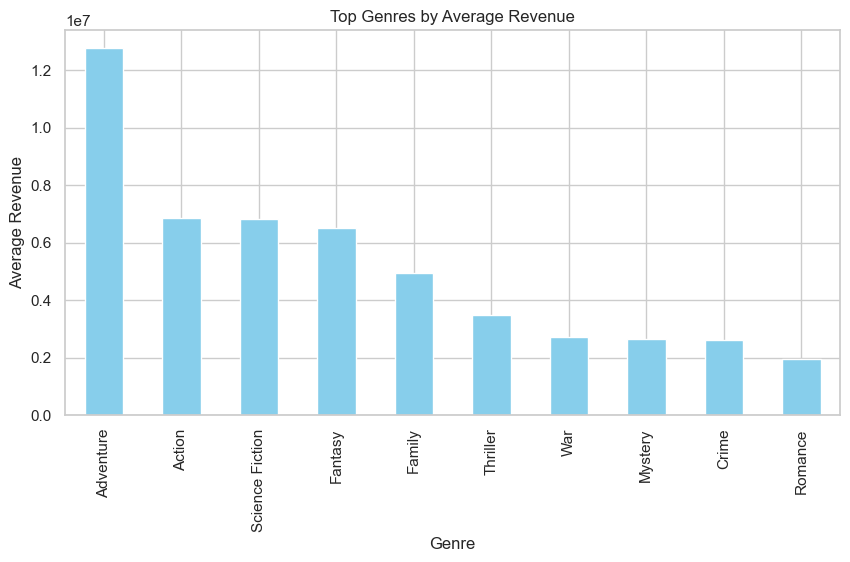

In [7]:
# Split the 'genres' column
df['genres'] = df['genres'].fillna('Unknown')
df['genres_split'] = df['genres'].apply(lambda x: x.split(", "))

# Explode the genres
genres_df = df.explode('genres_split')

# Revenue by genre
genre_revenue = genres_df.groupby('genres_split')['revenue'].mean().sort_values(ascending=False)

# Visualize top genres
plt.figure(figsize=(10, 5))
genre_revenue.head(10).plot(kind='bar', color='skyblue')
plt.title("Top Genres by Average Revenue")
plt.xlabel("Genre")
plt.ylabel("Average Revenue")
plt.show()


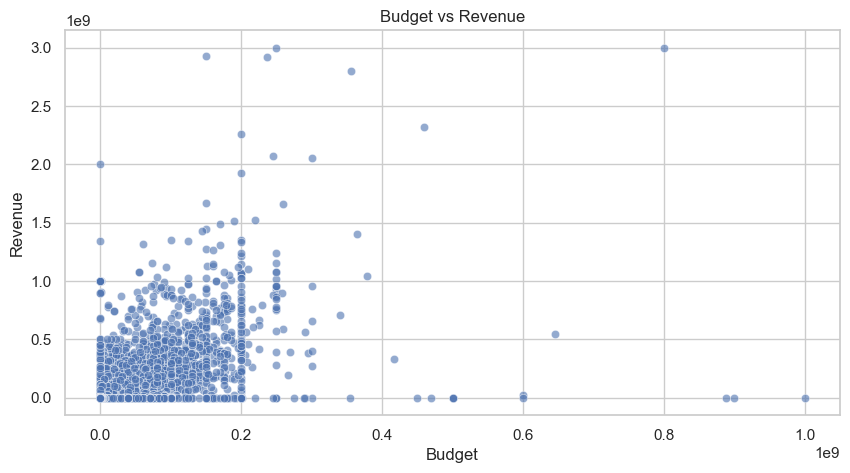

In [8]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['budget'], y=df['revenue'], alpha=0.6)
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()


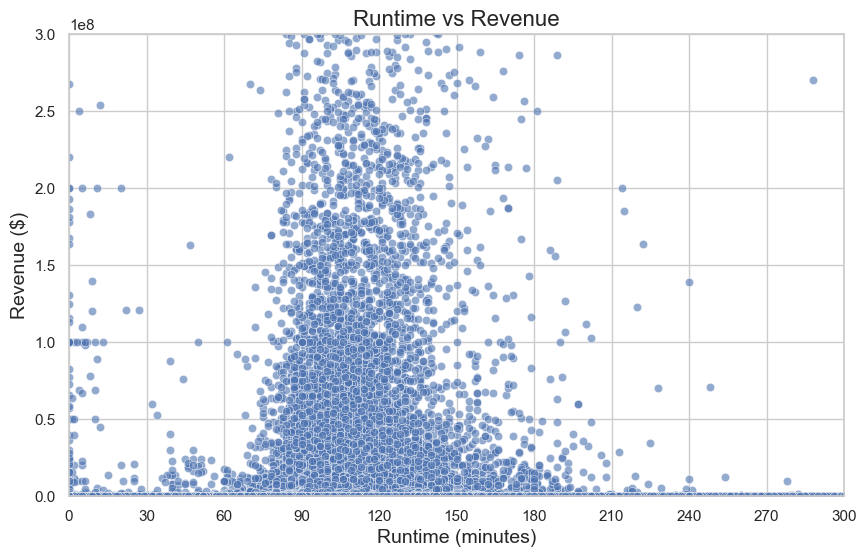

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the figure size
plt.figure(figsize=(10, 6))

# Scatter plot with Runtime vs Revenue
sns.scatterplot(x=df['runtime'], y=df['revenue'], alpha=0.6)

# Add title and labels
plt.title("Runtime vs Revenue", fontsize=16)
plt.xlabel("Runtime (minutes)", fontsize=14)
plt.ylabel("Revenue ($)", fontsize=14)

# Limit the x-axis to a reasonable range (you can adjust these values based on your dataset)
plt.xlim(0, 300)  # Set the x-axis limit for runtime (in minutes)

# Set y-axis limits to focus on relevant revenue range (optional)
plt.ylim(0, df['revenue'].max() * 0.1)  # Adjust this if needed based on your data distribution

# Adjust the x-axis ticks for better readability
plt.xticks(range(0, 301, 30))  # Ticks every 30 minutes for the runtime

# Show the plot
plt.show()


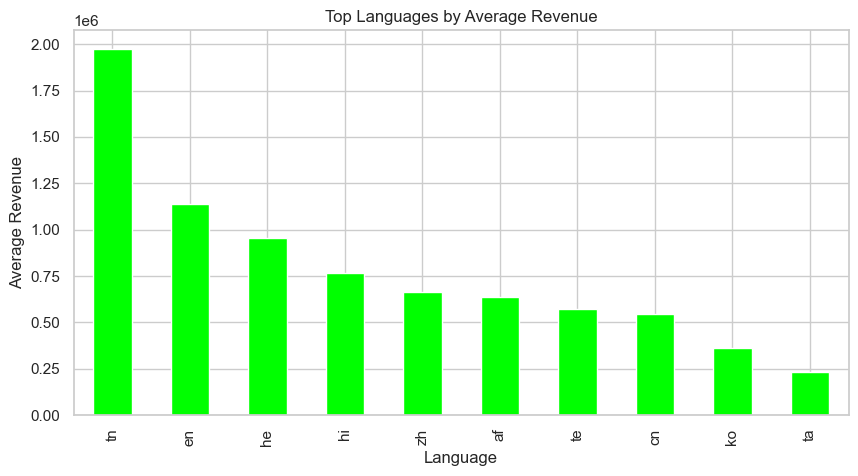

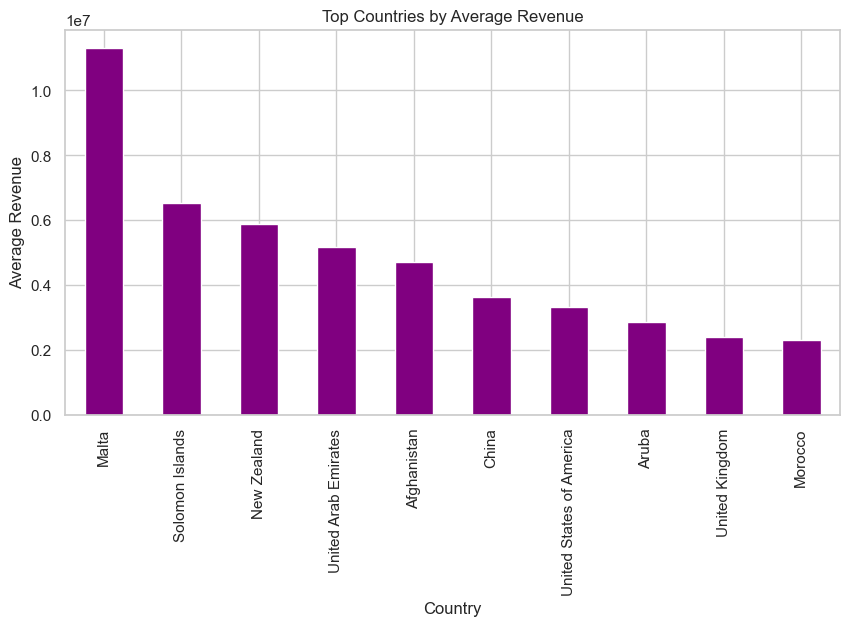

In [10]:
# Revenue by language
language_revenue = df.groupby('original_language')['revenue'].mean().sort_values(ascending=False)

# Visualize top languages
plt.figure(figsize=(10, 5))
language_revenue.head(10).plot(kind='bar', color='lime')
plt.title("Top Languages by Average Revenue")
plt.xlabel("Language")
plt.ylabel("Average Revenue")
plt.show()

# Revenue by country
df['production_countries'] = df['production_countries'].fillna('Unknown')
df['countries_split'] = df['production_countries'].apply(lambda x: x.split(", "))
countries_df = df.explode('countries_split')

# Top countries by revenue
country_revenue = countries_df.groupby('countries_split')['revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
country_revenue.head(10).plot(kind='bar', color='purple')
plt.title("Top Countries by Average Revenue")
plt.xlabel("Country")
plt.ylabel("Average Revenue")
plt.show()


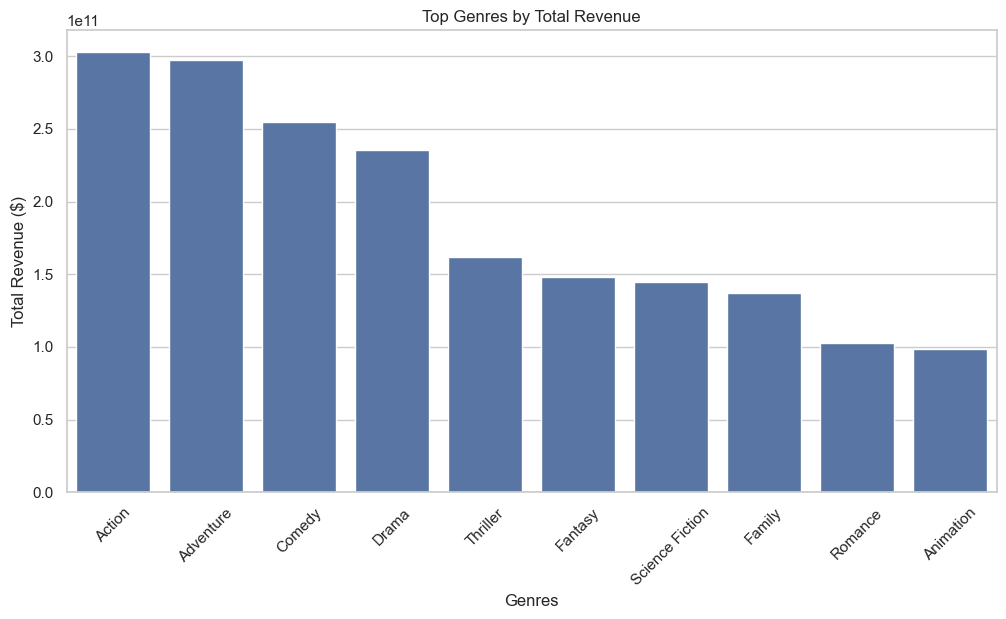

In [11]:
# Split genres into separate rows+

df_genres = df.copy()
df_genres['genres'] = df['genres'].str.split(', ')
df_genres = df_genres.explode('genres')

# Group by genres and calculate total and average revenue
genre_revenue = df_genres.groupby('genres')['revenue'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)

# Plot top-performing genres by total revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.index[:10], y=genre_revenue['sum'][:10])
plt.title("Top Genres by Total Revenue")
plt.xlabel("Genres")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()


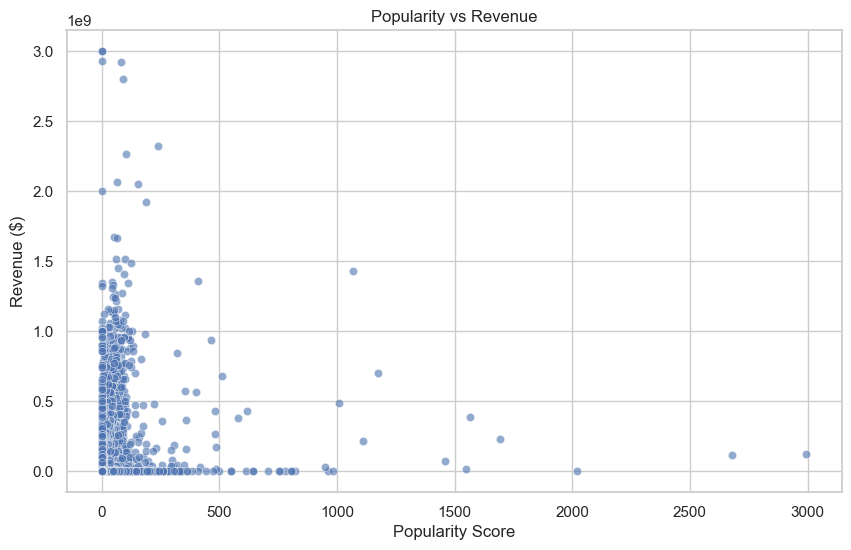

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['popularity'], y=df['revenue'], alpha=0.6)
plt.title("Popularity vs Revenue")
plt.xlabel("Popularity Score")
plt.ylabel("Revenue ($)")
plt.show()


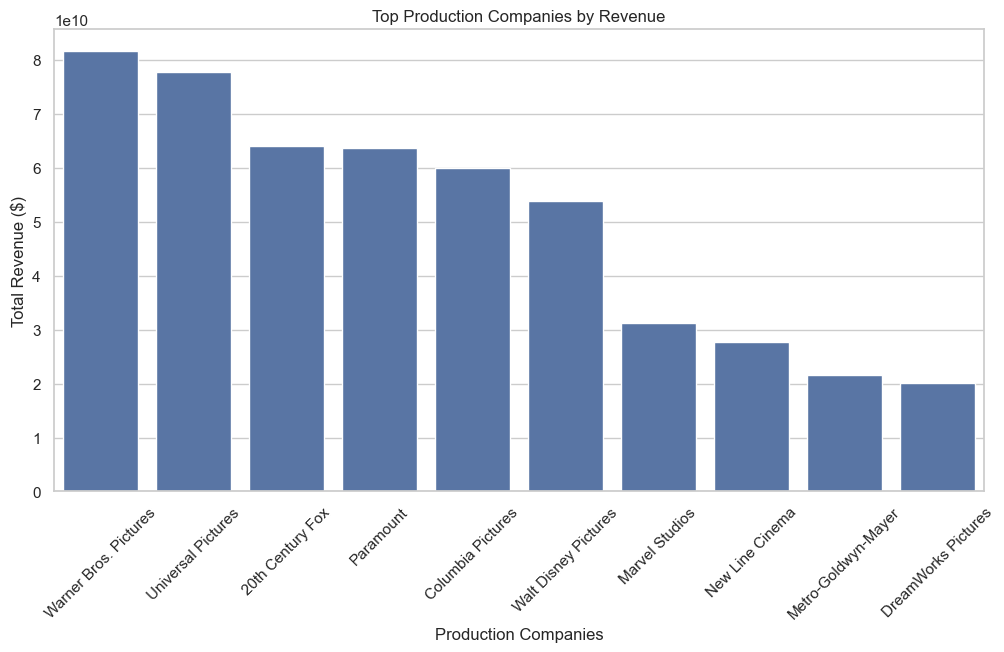

In [15]:
# Split production companies into separate rows
df_companies = df.copy()
df_companies['production_companies'] = df['production_companies'].str.split(', ')
df_companies = df_companies.explode('production_companies')

# Group by production companies and calculate total revenue
company_revenue = df_companies.groupby('production_companies')['revenue'].sum().sort_values(ascending=False)

# Plot top production companies by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=company_revenue.index[:10], y=company_revenue.values[:10])
plt.title("Top Production Companies by Revenue")
plt.xlabel("Production Companies")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()


In [16]:
# Find the top 10 movies by revenue
top_revenue_movies = df[['title', 'revenue', 'budget', 'release_date']].sort_values(by='revenue', ascending=False).head(10)
print("Top 10 Movies by Revenue:\n", top_revenue_movies)


Top 10 Movies by Revenue:
                                title     revenue     budget release_date
572896       Adventures in Bora Bora  3000000000  800000000          NaT
262398             TikTok Rizz Party  3000000000  250000000          NaT
529938                     Bee Movie  2930000000  150000000          NaT
3                             Avatar  2923706026  237000000          NaT
15                 Avengers: Endgame  2800000000  356000000          NaT
282         Avatar: The Way of Water  2320250281  460000000          NaT
17                           Titanic  2264162353  200000000          NaT
56      Star Wars: The Force Awakens  2068223624  245000000          NaT
6             Avengers: Infinity War  2052415039  300000000          NaT
723665                   Best Of Joy  2000000000       1000          NaT


In [12]:
print("\n--- Insights ---")
print("1. High-performing genres, such as Action, Adventure, and Science Fiction, generate higher average revenues.")
print("2. Movies released during peak months (e.g., summer and holiday seasons) tend to generate higher revenues.")
print("3. There is a strong positive correlation between budget and revenue. Higher budgets generally lead to better revenue.")
print("4. Movies with multi-language options and production in diverse countries perform better in terms of revenue.")

print("\n--- Recommendations ---")
print("1. Invest in creating movies in high-performing genres like Action, Adventure, and Science Fiction.")
print("2. Schedule movie releases during peak months, such as summer holidays (June-August) or festive seasons (November-December).")
print("3. Allocate sufficient budgets for movie production, ensuring high-quality output and effective marketing.")
print("4. Expand reach by targeting international markets with multi-language support.")
print("5. Ensure optimal runtime (e.g., around 120-150 minutes) to maximize audience engagement and revenue.")



--- Insights ---
1. High-performing genres, such as Action, Adventure, and Science Fiction, generate higher average revenues.
2. Movies released during peak months (e.g., summer and holiday seasons) tend to generate higher revenues.
3. There is a strong positive correlation between budget and revenue. Higher budgets generally lead to better revenue.
4. Movies with multi-language options and production in diverse countries perform better in terms of revenue.

--- Recommendations ---
1. Invest in creating movies in high-performing genres like Action, Adventure, and Science Fiction.
2. Schedule movie releases during peak months, such as summer holidays (June-August) or festive seasons (November-December).
3. Allocate sufficient budgets for movie production, ensuring high-quality output and effective marketing.
4. Expand reach by targeting international markets with multi-language support.
5. Ensure optimal runtime (e.g., around 120-150 minutes) to maximize audience engagement and revenue